<a href="https://colab.research.google.com/github/BrenesRi/Chelsea-Statistical-Breakdown/blob/master/Chelsea's_Statistical_Breakdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Alt text](https://isglobal.web.wilson-cooke.co.uk/wp-content//uploads/2019/06/Chelsea-Banner.png)

# **Chelsea's Matches Statistical Breakdown 1993-2023**

### **Ricardo Brenes Project, 2024**


You can find the **.csv dataset** in: [Premier League 1993-2023](https://www.kaggle.com/datasets/evangower/premier-league-matches-19922022)

This analysis looks for tendencies in **Chelsea´s home and away Premier League matches from 1993 to 2023**.

Objectives:

1. Find out who is **the best manager** the team has had in the specified period of time.
2. Find out if **Stamford Bridge gives any advantage** and the **quantity** for this advantage.
3. **How many goals** does Chelsea usually score?
4. Discover **Chelsea's hardest rivalries**
5. Is **offensive** football the **key to Chelsea's success**?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('premier-league-matches.csv')

#Now we get on Chelsea matches specifically, Home and Away.
cm = df[(df['Home'] == 'Chelsea') | (df['Away'] == 'Chelsea')].copy()

Saving premier-league-matches.csv to premier-league-matches.csv


## **Performance Across Premier League Seasons**

First thing we have to do is calculate the total points Chelsea did every specific season in this period of time, this way we can tell which period of time has been the best based on points achieved.

In [ ]:
def calculate_points(row):
    if row['FTR'] == 'D':
            return 1
    elif row['Home'] == 'Chelsea':
        if row['FTR'] == 'H':
            return 3
        else:
            return 0
    elif row['Away'] == 'Chelsea':
        if row['FTR'] == 'A':
            return 3
        else:
            return 0
    return 0

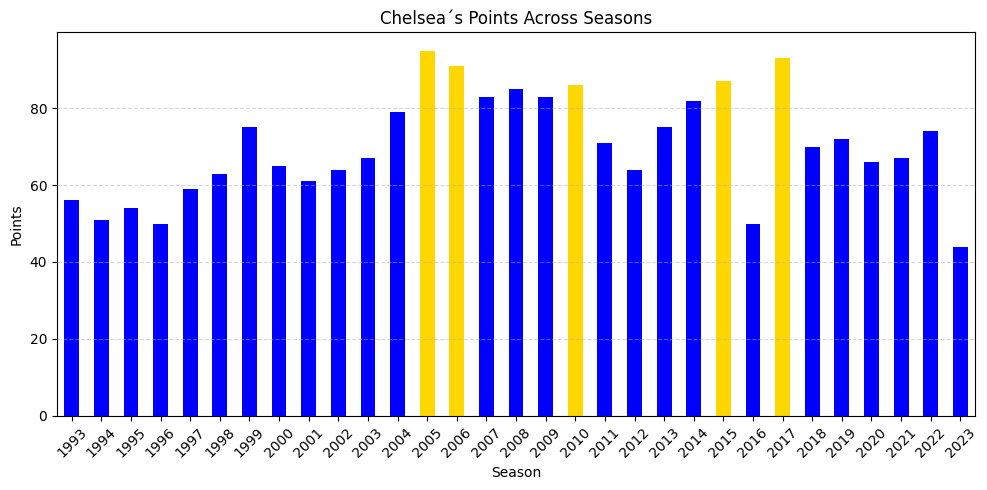

In [ ]:
championships = [2017, 2015, 2010, 2006, 2005]
cm['Points'] = cm.apply(calculate_points, axis=1)
points_by_season = cm.groupby('Season_End_Year')['Points'].sum()
colors = ['gold' if year in championships else 'blue' for year in points_by_season.index]

plt.figure(figsize=(10, 5))
points_by_season.plot(kind='bar', color=colors)
plt.title('Chelsea´s Points Across Seasons')
plt.xlabel('Season')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### First thing clear in the graphic, based on points achieved we can clearly tell that the best period of time for Chelsea was between **2005 and 2010**, where they conquered the **Premier League three times out of six possible** and made **over 80 points** every single year, they also won some other domestic cups.

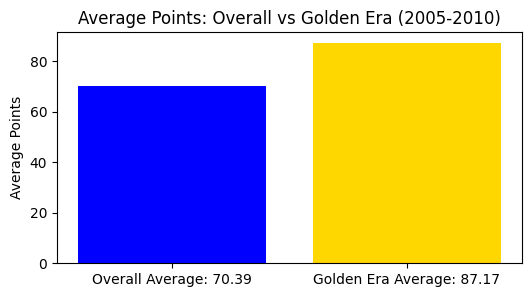

Percentage of improvement: 23.83898564008555%


In [ ]:
golden_era = points_by_season[(points_by_season.index >= 2005) & (points_by_season.index <= 2010)]
average_points = points_by_season.mean()
golden_era_average = golden_era.mean()

labels = [f'Overall Average: {average_points:.2f}', f'Golden Era Average: {golden_era_average:.2f}']
values = [average_points, golden_era_average]
colors = ['blue', 'gold']

plt.figure(figsize=(6, 3))
plt.bar(labels, values, color=colors)
plt.title('Average Points: Overall vs Golden Era (2005-2010)')
plt.ylabel('Average Points')
plt.show()

print(f'Percentage of improvement: {((golden_era_average - average_points) / average_points) * 100}%')

Here, we can see that the team performed approximately a **23.84%** better between 2005 and 2010 than in the average between 1993 and 2023, averaging approximately **17 more points** per season.

This statistic helps us a lot to find out **who has been the best Chelsea manager between 1993 and 2023**; it should be the head manager in the best period of time for the team, so we can come up with an answer to the question:

# **The most successful manager in Chelsea´s Premier League history based on data is José Mourinho**

He replaced Claudio Ranieri in 2005 and led the team to win the Premier League twice, the EFL Cup twice, one FA Cup, and one Community Shield. He left Chelsea in 2007, halfway through the "golden era", but he clearly is the **most successful manager in Chelsea´s Premier League history**.

Another managers Chelsea had in this "golden era" between 2007 and 2010 were Avram Grant, Luiz Felipe Scolari, Ray Wilkings (as a caretaker manager), Guus Hiddink (as an interim manager), and Carlo Ancelotti, who won the last Premier League in this "golden era".

![Alt text](https://i.ytimg.com/vi/JASSwvRpqgE/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLC6yjXFmFoh4hrm6XiR_e2bG6DpKQ)

# **Does Stamford Bridge give any advantage to the team?**

### Let's take a look at the points made every season once again, but this time separating points won at home from points won away.

In [ ]:
def calculate_home_points(row):
    if row['FTR'] == 'D':
            return 1
    elif row['Home'] == 'Chelsea':
        if row['FTR'] == 'H':
            return 3
        else:
            return 0
    return 0

def calculate_away_points(row):
    if row['FTR'] == 'D':
            return 1
    elif row['Away'] == 'Chelsea':
        if row['FTR'] == 'A':
            return 3
        else:
            return 0
    return 0

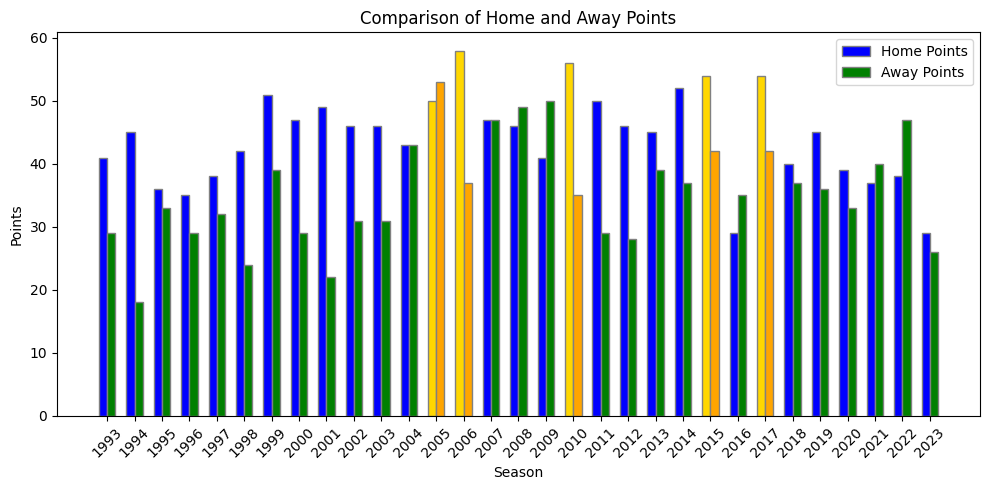

In [ ]:
cm['Home_Points'] = cm.apply(calculate_home_points, axis=1)
home_points_by_season = cm.groupby('Season_End_Year')['Home_Points'].sum()
home_colors = ['gold' if year in championships else 'blue' for year in home_points_by_season.index]

cm['Away_Points'] = cm.apply(calculate_away_points, axis=1)
away_points_by_season = cm.groupby('Season_End_Year')['Away_Points'].sum()
away_colors = ['orange' if year in championships else 'green' for year in away_points_by_season.index]

seasons = home_points_by_season.index
bar_width = 0.3

r1 = np.arange(len(seasons))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 5))
plt.bar(r1, home_points_by_season, color=home_colors, width=bar_width, edgecolor='grey', label='Home Points')
plt.bar(r2, away_points_by_season, color=away_colors, width=bar_width, edgecolor='grey', label='Away Points')

plt.xlabel('Season')
plt.ylabel('Points')
plt.title('Comparison of Home and Away Points')
plt.xticks([r + bar_width / 2 for r in range(len(seasons))], seasons, rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

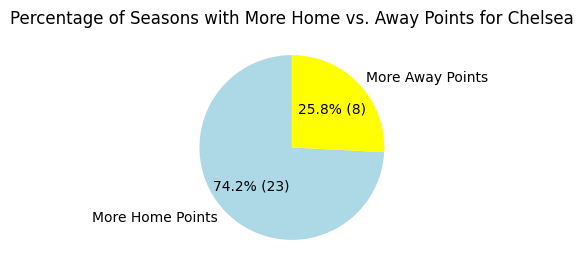

In [ ]:
labels = ['More Home Points', 'More Away Points']
home_wins = (home_points_by_season > away_points_by_season).sum()
away_wins = (home_points_by_season <= away_points_by_season).sum()
sizes = [home_wins, away_wins]
colors = ['lightblue', 'yellow']

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(sizes) / 100), startangle=90)
plt.title('Percentage of Seasons with More Home vs. Away Points for Chelsea')
plt.show()

We've seen that most of the seasons Chelsea makes more points home than away, **making it clear that Stamford Bridge DOES give some advantage to the team**, but how much?

In [ ]:
total_home_points = home_points_by_season.sum()
total_away_points = away_points_by_season.sum()
percentage_improvement = ((total_home_points - total_away_points) / total_away_points) * 100
print(percentage_improvement)

24.773139745916513


### Statistically, **Chelsea in the period 1993–2023 has earned approximately 25% more points when playing at home than when playing away.**

![Alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Stamford_Bridge%2C_Chelsea_vs_Nottingham_Forest%2C_5_January_2020.jpg/600px-Stamford_Bridge%2C_Chelsea_vs_Nottingham_Forest%2C_5_January_2020.jpg)

# **How many goals does Chelsea usually score?**

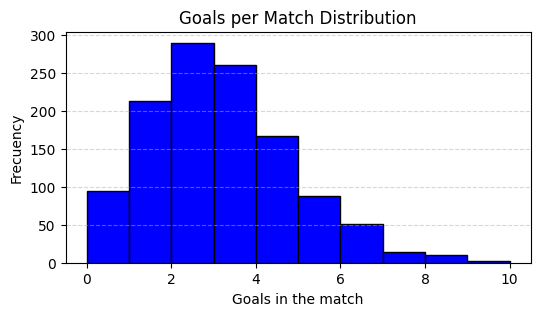

In [ ]:
cm['Total_Goals'] = cm['HomeGoals'] + cm['AwayGoals']
plt.figure(figsize=(6, 3))
plt.hist(cm['Total_Goals'], bins=range(0, max(cm['Total_Goals']) + 2), color='blue', edgecolor='black')
plt.title('Goals per Match Distribution')
plt.xlabel('Goals in the match')
plt.ylabel('Frecuency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

The **most common number** of goals scored by Chelsea across all matches between 1993 and 2023 was **2 goals**.

# **Which are Chelsea's hardest rivals to face?**

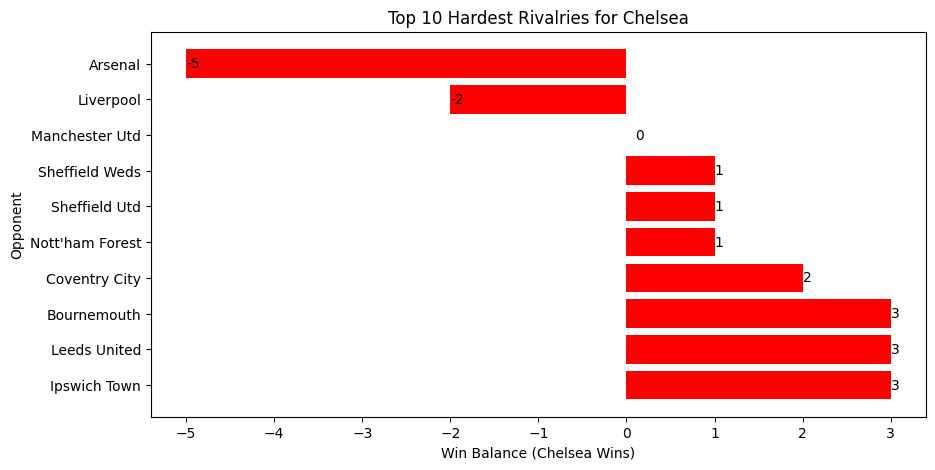

In [ ]:
def get_chelsea_result(row):
    if row['Home'] == 'Chelsea':
        if row['FTR'] == 'H':
            return 'Win'
        elif row['FTR'] == 'D':
            return 'Draw'
        else:
            return 'Loss'
    else:
        if row['FTR'] == 'A':
            return 'Win'
        elif row['FTR'] == 'D':
            return 'Draw'
        else:
            return 'Loss'
cm['Chelsea_Result'] = cm.apply(get_chelsea_result, axis=1)


def get_opponent(row):
    return row['Away'] if row['Home'] == 'Chelsea' else row['Home']
cm['Opponent'] = cm.apply(get_opponent, axis=1)
chelsea_wins = cm[cm['Chelsea_Result'] == 'Win'].groupby('Opponent').size()
opponent_wins = cm[cm['Chelsea_Result'] == 'Loss'].groupby('Opponent').size()
matches_played = cm.groupby('Opponent').size()

rivalries = pd.DataFrame({'Matches_Played': matches_played, 'Chelsea_Wins': chelsea_wins, 'Opponent_Wins': opponent_wins}).fillna(0)
rivalries['Win_Balance'] = rivalries['Chelsea_Wins'] - rivalries['Opponent_Wins']
relevant_rivalries = rivalries[rivalries['Matches_Played'] > 5]
negative_rivalries_sorted = relevant_rivalries.sort_values(by='Win_Balance')

top_negative_rivalries = negative_rivalries_sorted.head(10)
plt.figure(figsize=(10, 5))
bars = plt.barh(top_negative_rivalries.index, top_negative_rivalries['Win_Balance'], color='red')
plt.title('Top 10 Hardest Rivalries for Chelsea')
plt.xlabel('Win Balance (Chelsea Wins)')
plt.ylabel('Opponent')
plt.gca().invert_yaxis()
for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width != 0 else 0.1  # Ajusta la posición para valores 0
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')
plt.show()


### From the collected data, we can say that historically, the hardest rivalries for Chelsea are **Arsenal, Liverpool, and Manchester United**.

# **W/D/L and Scored/Received Goals Chelsea´s Heatmap**

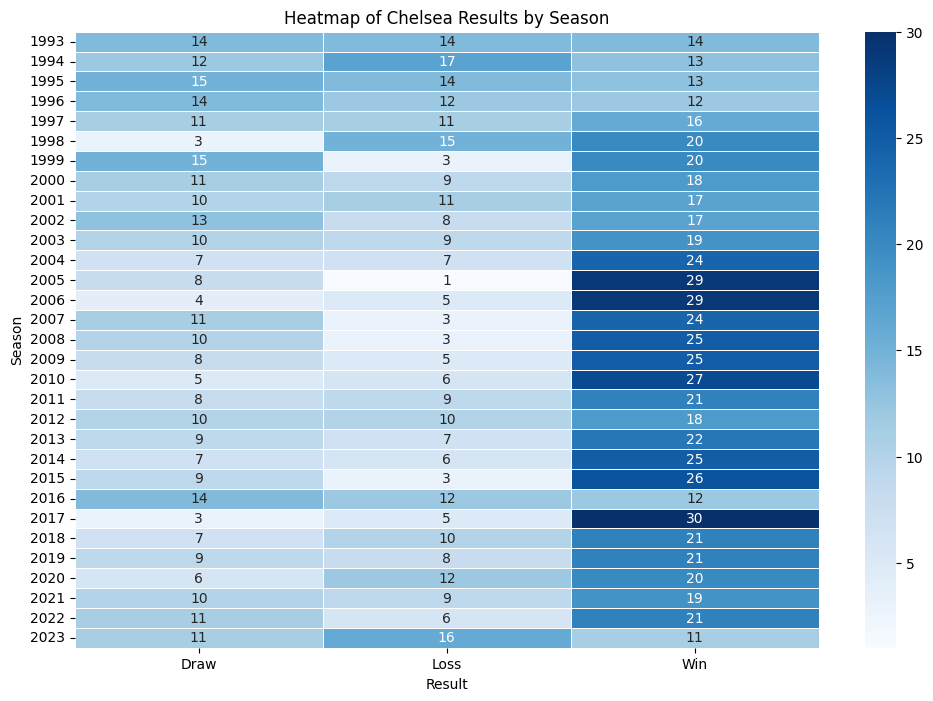

In [ ]:
results_by_season = cm.groupby(['Season_End_Year', 'Chelsea_Result']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(results_by_season, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Chelsea Results by Season')
plt.xlabel('Result')
plt.ylabel('Season')
plt.show()

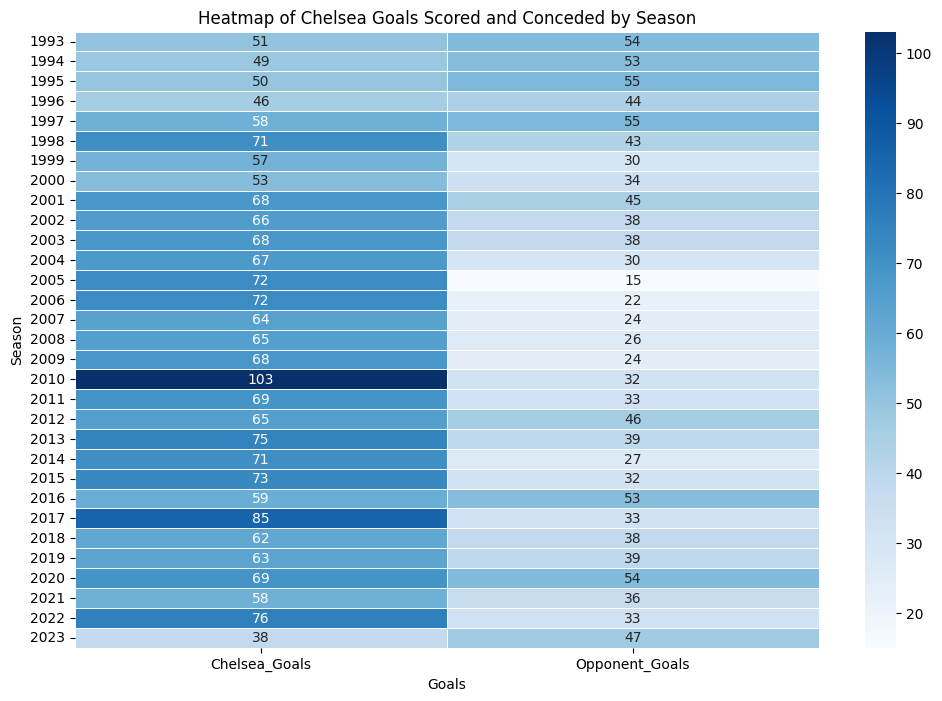

In [ ]:
def get_chelsea_goals(row):
    if row['Home'] == 'Chelsea':
        return row['HomeGoals'], row['AwayGoals']
    else:
        return row['AwayGoals'], row['HomeGoals']
cm['Chelsea_Goals'], cm['Opponent_Goals'] = zip(*cm.apply(get_chelsea_goals, axis=1))
goals_by_season = cm.groupby('Season_End_Year').agg({'Chelsea_Goals': 'sum', 'Opponent_Goals': 'sum'})

plt.figure(figsize=(12, 8))
sns.heatmap(goals_by_season, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Chelsea Goals Scored and Conceded by Season')
plt.xlabel('Goals')
plt.ylabel('Season')
plt.show()

There is an interesting trend if we analyze these heat maps: the "golden era" between 2005 and 2010 **was not offensive football**, they even scored fewer goals than previous years, but the **defensive solidity of the team and conceding few goals** was the key to the achievements of this era.